In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

The data fields in the given file are
**TripID** Unique identity of trip
**RouteID** Value representing public transport route
**StopID** Unique identity of stop
**StopName** Name of given stop
**WeekBeginning** Date representing first day of any week
**NumberOfBoarding** Count of all boarding’s occurred at this stop for the named trip over the previous week




In [10]:
# Step 1: Load the dataset
print("Load the dataset")
import pandas as pd
data = pd.read_csv('/kaggle/input/unisys/20140711.CSV', low_memory=False)
data.shape
data.head(30)


Load the dataset


,TripID,RouteID,StopID,StopName,WeekBeginning,NumberOfBoardings
0,23631,100,14156,181 Cross Rd,2013-06-30 00:00:00,1
1,23631,100,14144,177 Cross Rd,2013-06-30 00:00:00,1
2,23632,100,14132,175 Cross Rd,2013-06-30 00:00:00,1
3,23633,100,12266,Zone A Arndale Interchange,2013-06-30 00:00:00,2
4,23633,100,14147,178 Cross Rd,2013-06-30 00:00:00,1
5,23634,100,13907,9A Marion Rd,2013-06-30 00:00:00,1
6,23634,100,14132,175 Cross Rd,2013-06-30 00:00:00,1
7,23634,100,13335,9A Holbrooks Rd,2013-06-30 00:00:00,1
8,23634,100,13875,9 Marion Rd,2013-06-30 00:00:00,1
9,23634,100,13045,206 Holbrooks Rd,2013-06-30 00:00:00,1



Check data types of columns
TripID                int64
RouteID              object
StopID                int64
StopName             object
WeekBeginning        object
NumberOfBoardings     int64
dtype: object


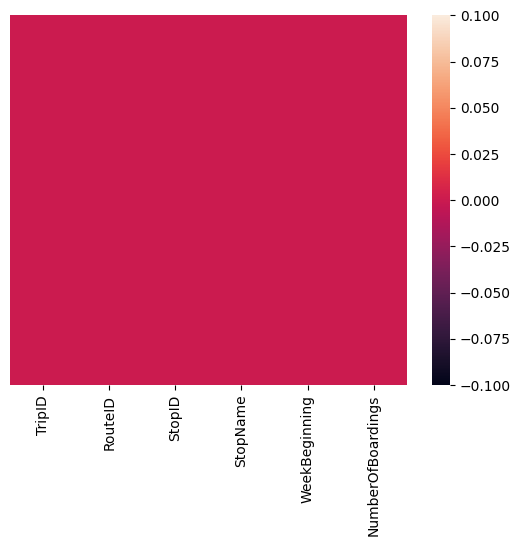

In [12]:
# Step 2:  Drop duplicates and Check data types of columns
data = data.drop_duplicates()
import seaborn as sns
sns.heatmap(data.isnull(),yticklabels= False)
print("\nCheck data types of columns")
print(data.dtypes)


In [13]:
# Step 3: Handle mixed data types
#'RouteID' column has mixed types, convert it to numeric
data['RouteID'] = pd.to_numeric(data['RouteID'], errors='coerce')
print("Handle mixed data types")
print(data.dtypes)


Handle mixed data types
TripID                 int64
RouteID              float64
StopID                 int64
StopName              object
WeekBeginning         object
NumberOfBoardings      int64
dtype: object


In [ ]:
# Step 4: Handle missing values
# Drop rows with missing values or fill them based on your project requirements
data = data.dropna()
print("\nHandle missing values")
print(data.shape)

In [ ]:
# Step 5: Convert 'WeekBeginning' column to datetime format
data['WeekBeginning'] = pd.to_datetime(data['WeekBeginning'], errors='coerce')
print("\nConvert 'WeekBeginning' column to datetime format")
print(data['WeekBeginning'].head())

In [ ]:
# Step 6: Clean 'StopName' column
# Remove leading and trailing whitespaces
data['StopName'] = data['StopName'].str.strip()
print("\nClean 'StopName' column")
print(data['StopName'].head())


In [ ]:
#Unique values for each column in the DataFrame
print(data.nunique())

In [ ]:
data.shape
data.columns
data.head(3)

In [ ]:
#Count the number of missing value in each coloumn
data.isnull().sum()

In [ ]:
#different type of Unique Data in the dataset
data['WeekBeginning'].unique()

<Axes: xlabel='TripID'>

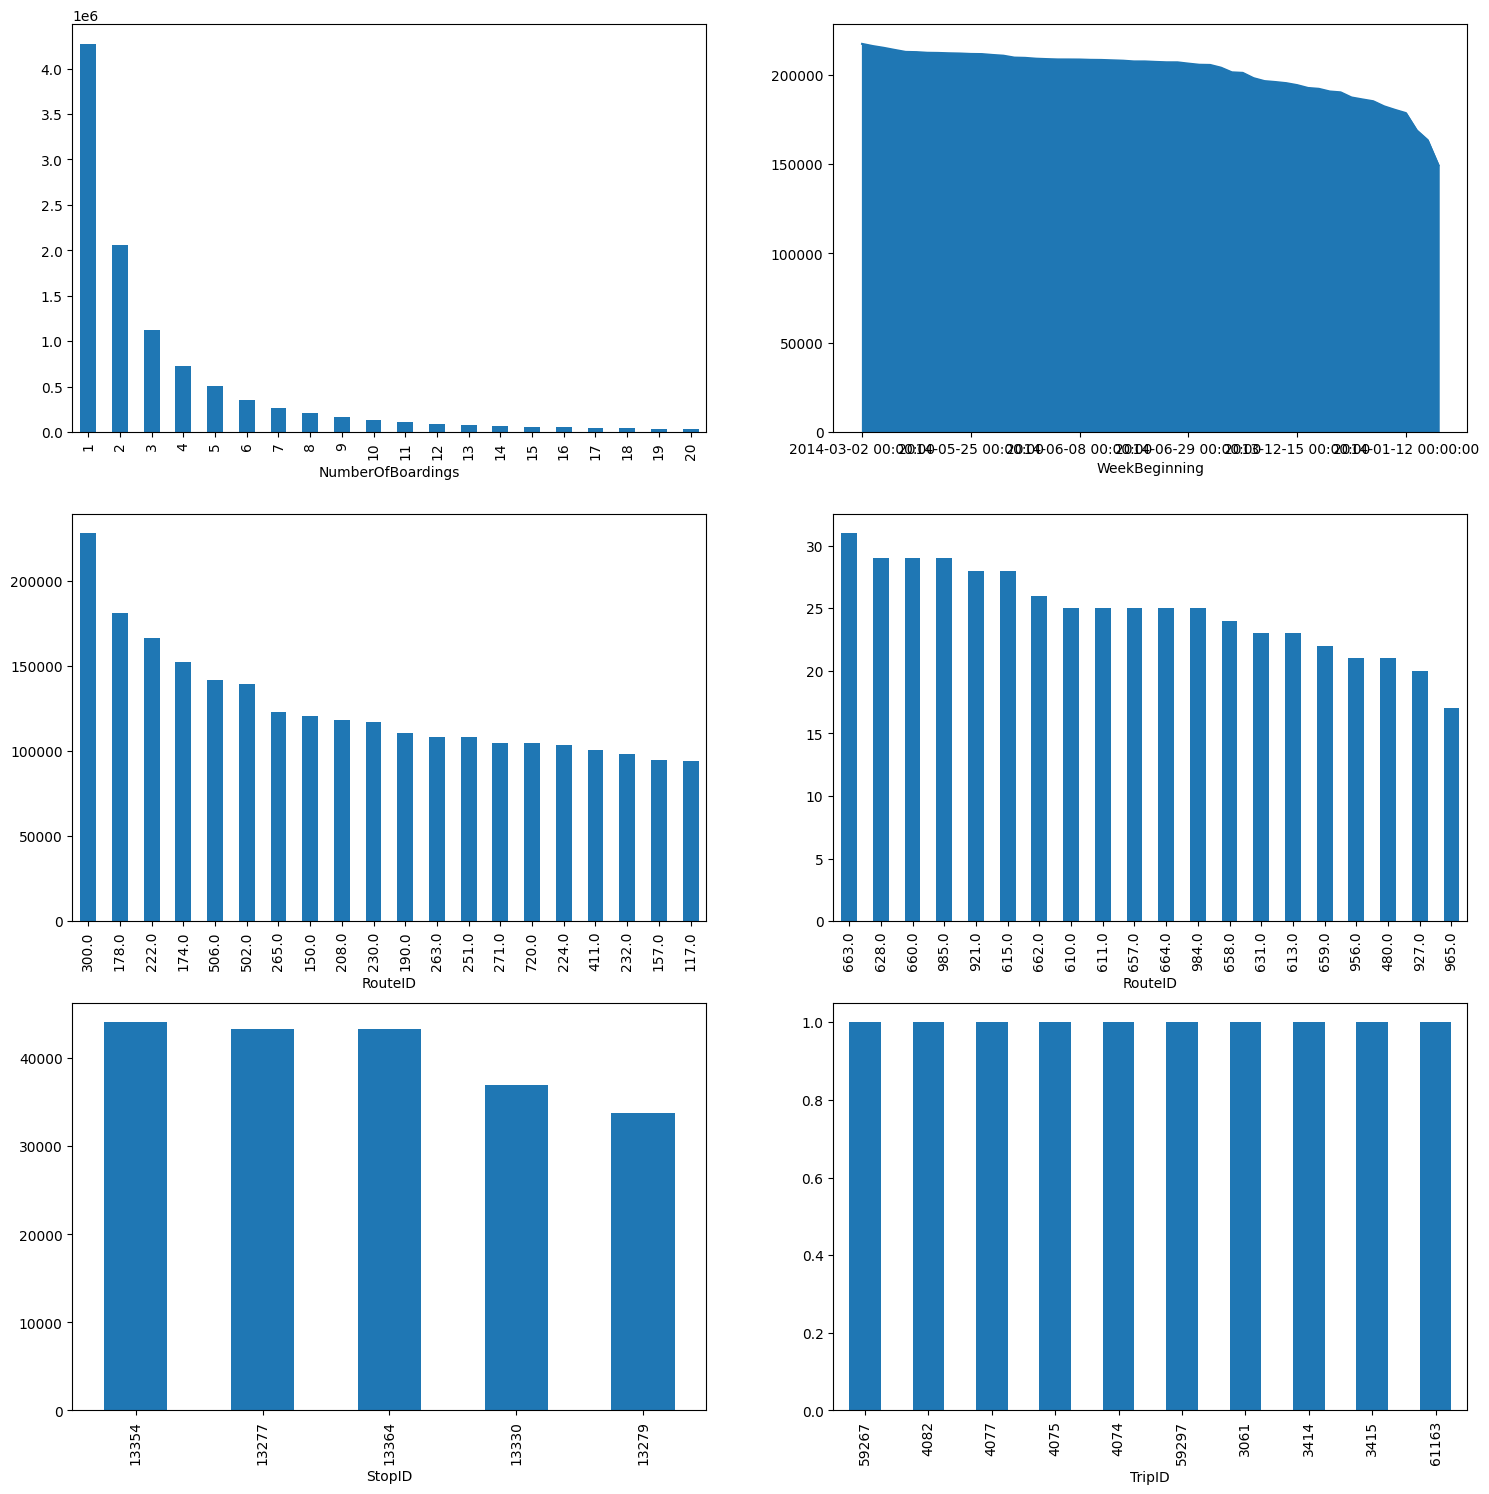

In [14]:
import matplotlib.pyplot as plt
fig,axrr=plt.subplots(3,2,figsize=(18,18))
data['NumberOfBoardings'].value_counts().sort_index().head(20).plot.bar(ax=axrr[0][0])
data['WeekBeginning'].value_counts().plot.area(ax=axrr[0][1])
data['RouteID'].value_counts().head(20).plot.bar(ax=axrr[1][0])
data['RouteID'].value_counts().tail(20).plot.bar(ax=axrr[1][1])
data['StopID'].value_counts().head(5).plot.bar(ax=axrr[2][0])
data['TripID'].value_counts().tail(10).plot.bar(ax=axrr[2][1])

In [ ]:
# Save the cleaned dataset to a new CSV file
data.to_csv('cleaned_data.csv', index=False)
print("\nSave the cleaned dataset to a new CSV file")
print("Cleaned dataset saved successfully.")

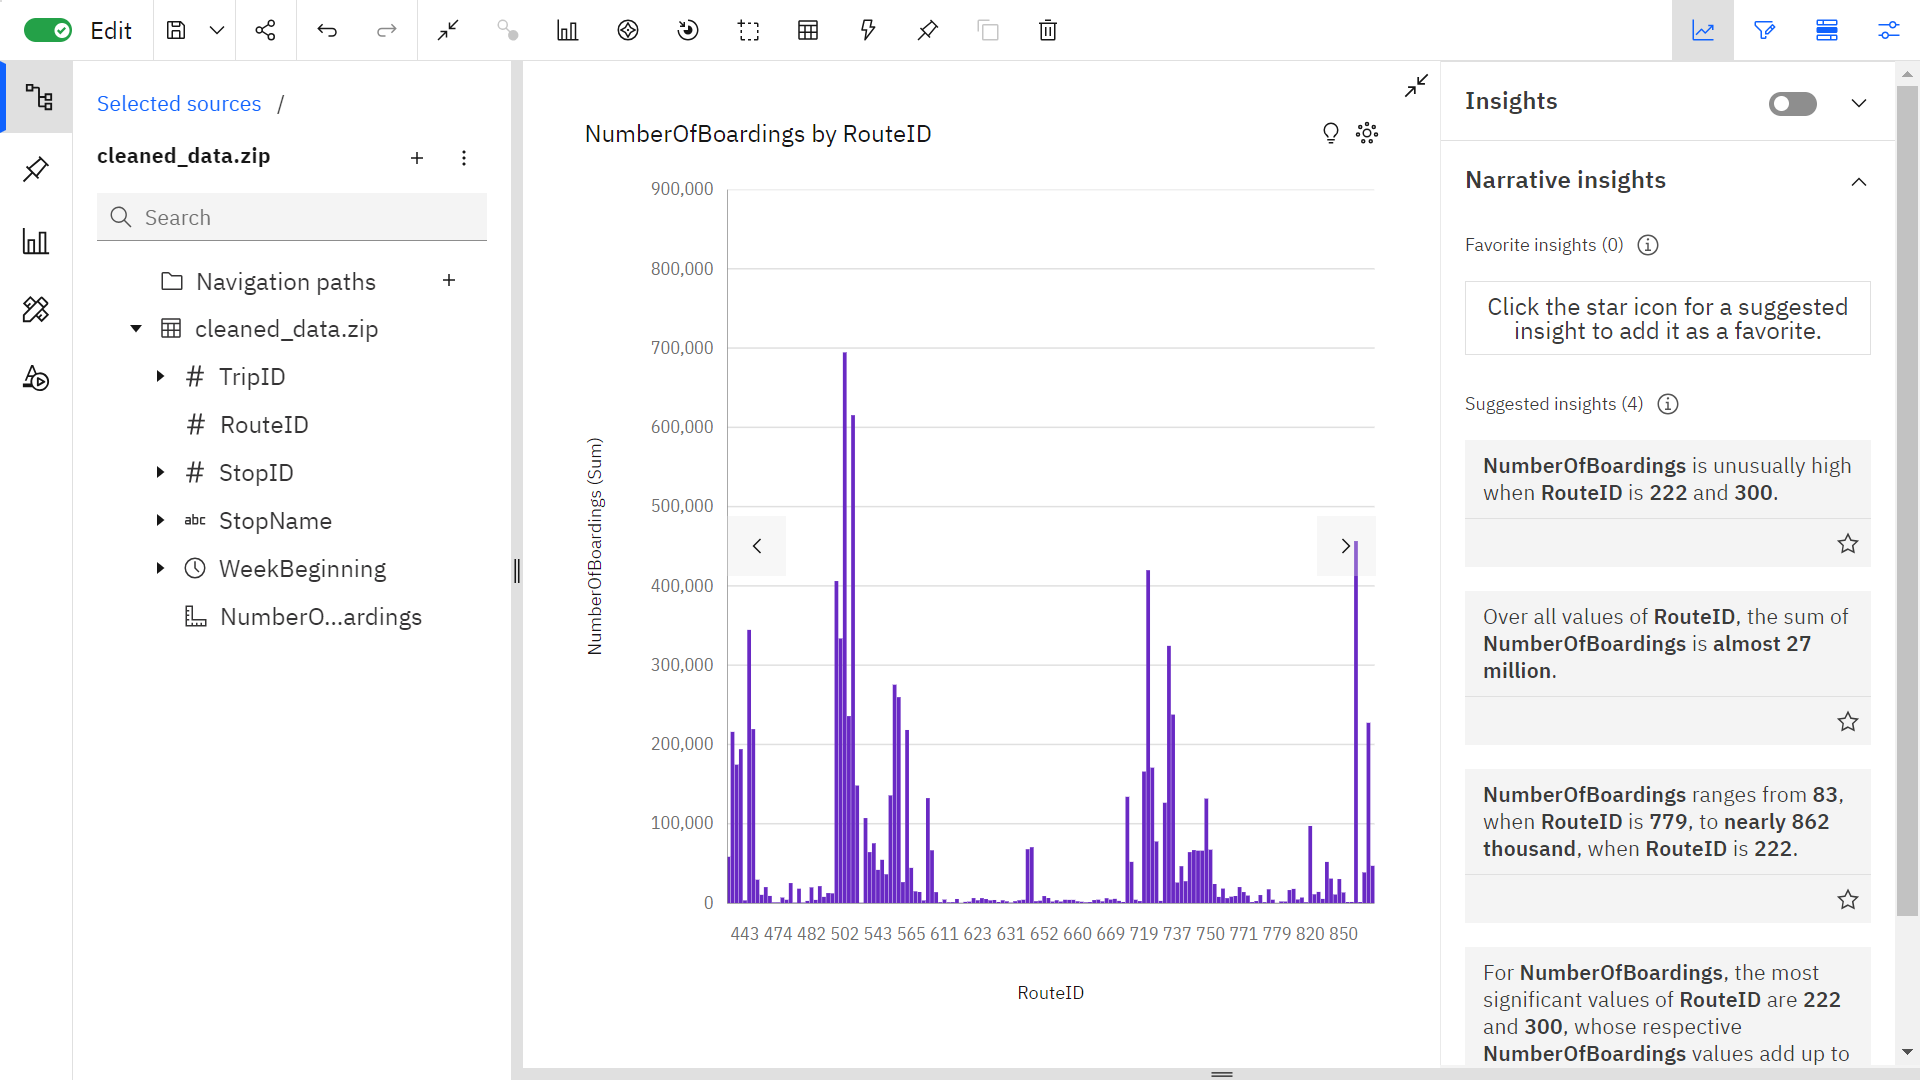

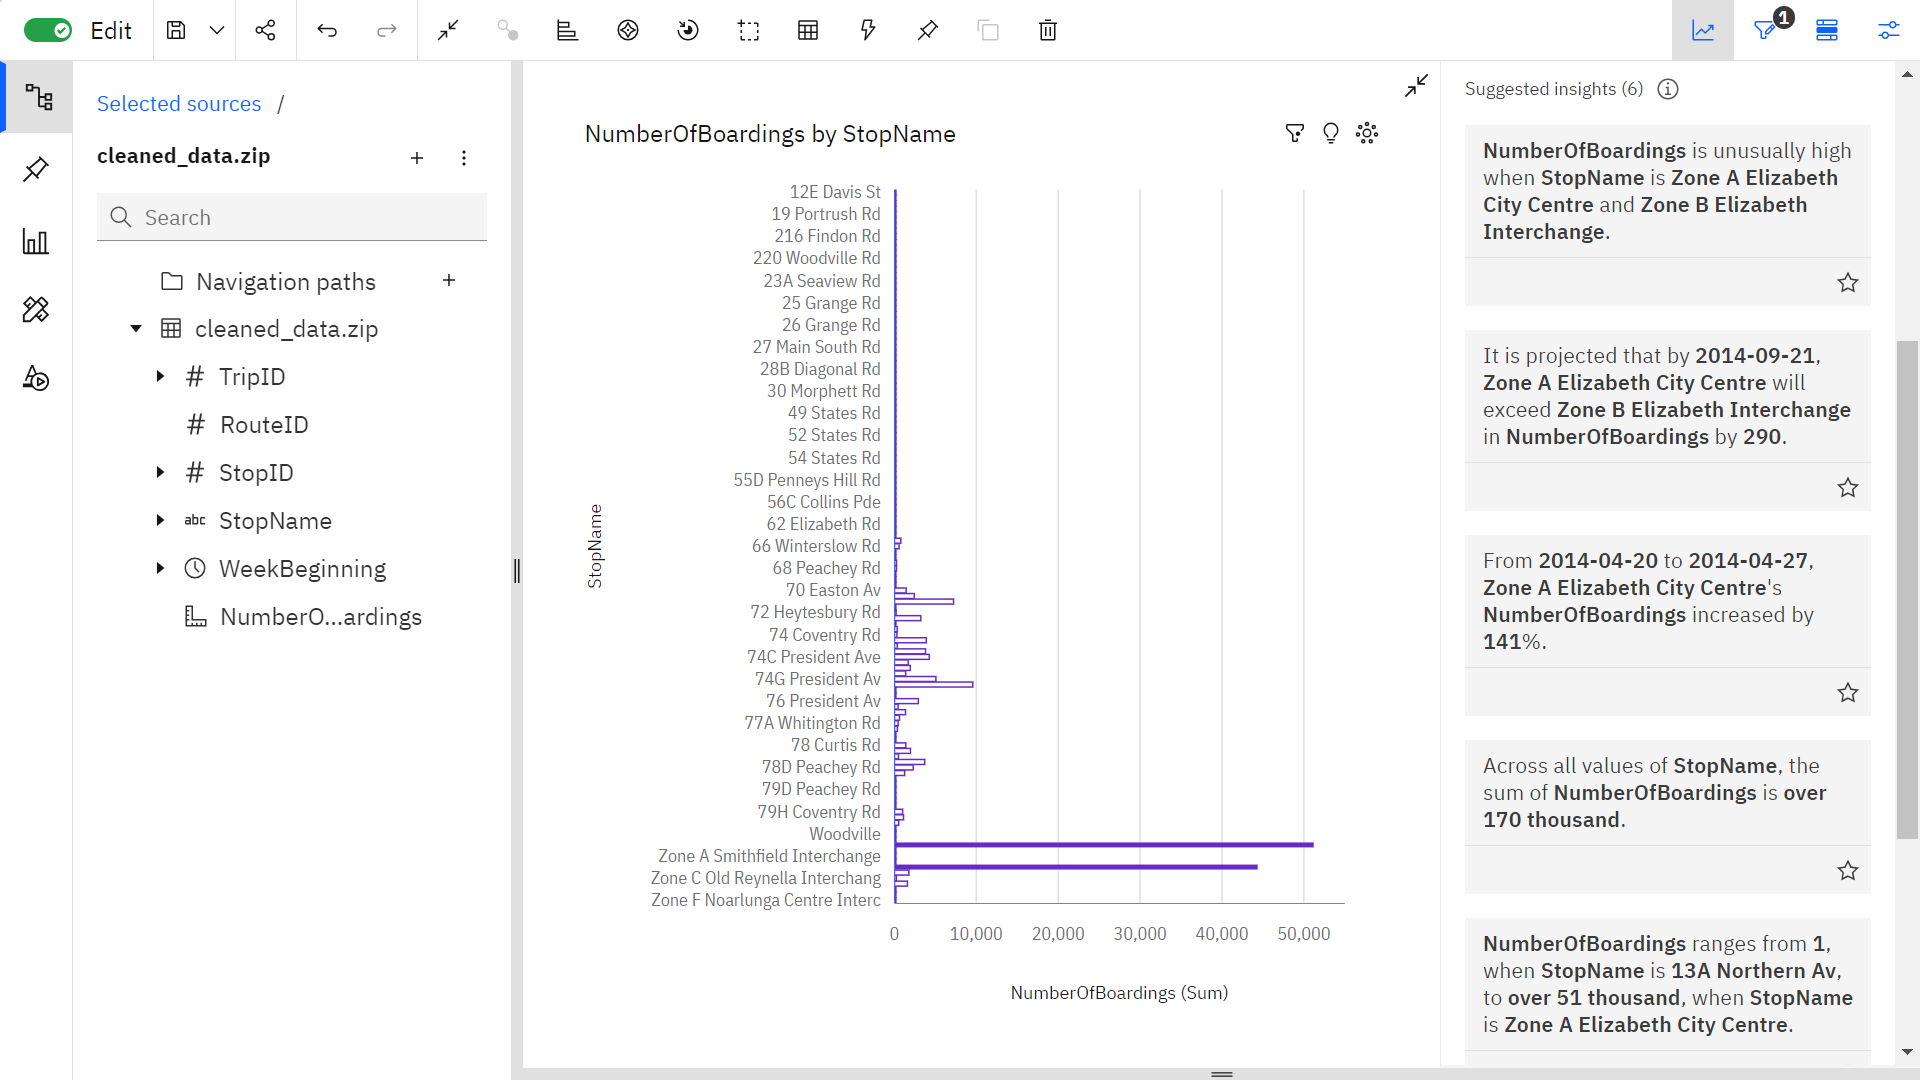